<a href="https://colab.research.google.com/github/BrainyHaron/DigitalBreakthrough/blob/Brainy's_Projects/das_pirat_OS_%20%D0%B4%D0%BB%D1%8F%20%D0%B7%D0%B0%D1%89%D0%B8%D1%82%D1%8B%20%D0%BD%D0%B0%20%D0%A6%D0%9F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install nltk
!pip install scipy

In [7]:
import numpy as np
from nltk.stem import *
from nltk.stem.porter import *
stemmer = PorterStemmer()
import os
import json
import pandas as pd
from google.colab import drive
# из библиотеки google.colab импортируем класс files
from google.colab import files
import math
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [8]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [9]:
path ='/content/drive/MyDrive/das_pirat_OS/labeled'
full_list3=[]
i=0
for file in os.listdir(path):
    try:
        with open(path+"/"+file,'r', encoding='Utf-8') as json_data:
            res1_loaded = json.load(json_data)

            k=res1_loaded['question']

            for answer in res1_loaded['answers']:
                l = [k]+[answer['answer'], answer['count'], answer['cluster'],answer['sentiment']]
                full_list3.append(l)

    except ValueError:
        #pass
        print(f'Unable to process {file}')
        print(f'Successfully constructed {len(res1_loaded)} files')

Unable to process 26765.json
Successfully constructed 3 files


In [10]:
print(l)
print(full_list3)
print(res1_loaded['answers'][0])

['Как вас зовут?', 'яна', 1, 'яна', 'neutrals']
[['Какие цели вы поставили себе на Школу тренеров?', 'прокачать тренерские знания', 1, 'улучшить тренерские знания', 'positives'], ['Какие цели вы поставили себе на Школу тренеров?', 'прокачать тренерские компетенц', 1, 'улучшить тренерские знания', 'positives'], ['Какие цели вы поставили себе на Школу тренеров?', 'прокачать тренерские навыки', 1, 'улучшить тренерские знания', 'positives'], ['Какие цели вы поставили себе на Школу тренеров?', 'совершенствоваться', 1, 'совершенствоваться', 'positives'], ['Какие цели вы поставили себе на Школу тренеров?', 'повышение производительности', 1, 'повышение производительности', 'positives'], ['Какие цели вы поставили себе на Школу тренеров?', 'получить ответы на вопросы', 1, 'решение вопросов', 'neutrals'], ['Какие цели вы поставили себе на Школу тренеров?', 'узнать ответы на интерес. вопр', 1, 'решение вопросов', 'neutrals'], ['Какие цели вы поставили себе на Школу тренеров?', 'решение вопросов', 

In [11]:
dat = pd.DataFrame(full_list3)
pd.set_option('display.max_colwidth', None)
dat.columns = ['question','answer', 'count', 'cluster','sentiment']
dat

,question,answer,count,cluster,sentiment
0,Какие цели вы поставили себе на Школу тренеров?,прокачать тренерские знания,1,улучшить тренерские знания,positives
1,Какие цели вы поставили себе на Школу тренеров?,прокачать тренерские компетенц,1,улучшить тренерские знания,positives
2,Какие цели вы поставили себе на Школу тренеров?,прокачать тренерские навыки,1,улучшить тренерские знания,positives
3,Какие цели вы поставили себе на Школу тренеров?,совершенствоваться,1,совершенствоваться,positives
4,Какие цели вы поставили себе на Школу тренеров?,повышение производительности,1,повышение производительности,positives
...,...,...,...,...,...
5232,Как вас зовут?,светлана,5,светлана,neutrals
5233,Как вас зовут?,сергей,1,сергей,neutrals
5234,Как вас зовут?,ужанна,1,ужанна,neutrals
5235,Как вас зовут?,юрий,1,юрий,neutrals


In [12]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5237 entries, 0 to 5236
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   question   5237 non-null   object
 1   answer     5237 non-null   object
 2   count      5237 non-null   int64 
 3   cluster    5237 non-null   object
 4   sentiment  5237 non-null   object
dtypes: int64(1), object(4)
memory usage: 204.7+ KB


In [13]:
dat.describe().applymap('{:,.2f}'.format)

,count
count,"5,237.00"
mean,1.62
std,3.55
min,1.00
25%,1.00
50%,1.00
75%,1.00
max,130.00


In [14]:
dat.describe(include=['object'])

,question,answer,cluster,sentiment
count,5237,5237,5237,5237
unique,127,4461,3265,5
top,Какие большие цели сейчас вдохновляют лично вас?,развитие,знакомства,neutrals
freq,339,16,25,3329


In [15]:
dat['question'].unique()

array(['Какие цели вы поставили себе на Школу тренеров?',
       'What countries are major investors abroad?',
       'Напишите ваши ожидания от курса в 2х словах?',
       'Что планируете применять из пройденного обучения в ближайшее время?',
       'Ключевые ассоциации с парадигмой политического реализма (5 слов)',
       'Что поможет сделать программу более полезной для вас?',
       'Name 4-5 emerging markets',
       'Какие направления работы, на ваш взгляд, обязательно должны быть в деятельности Совета молодежи?',
       'Как проходит процесс адаптации?',
       'Ключевые ассоциации с либерально-идеалистической парадигмой',
       'Напишите 3 (три) ваши ассоциации с Китаем',
       'Какие эмоции вы испытали от участия в Чемпионате? (введите не более 3-х слов)',
       'С чем у Вас ассоциируется прошедшая сессия?',
       'Name 3 most important skills that you expect you will need in your future job.',
       'Как настроение?', 'Ваши открытия за время обучения на модуле',
       '

In [16]:
dat['question'].nunique() #всего уникальных значегий

127

In [17]:
dat['answer_count'] = (dat.groupby("question")['answer'].transform('nunique'))
dat['sentiment_count'] = (dat.groupby("sentiment")['question'].transform('nunique'))

In [18]:
idx = pd.Index(dat['question'], name ='index_question')
idx.value_counts()

Какие большие цели сейчас вдохновляют лично вас?                                                               339
Что позволяет вам лично поддерживать уверенность и рабочий настрой?                                            230
Какие большие примеры вас сейчас вдохновляют?                                                                  220
На какие еще темы вы хотели бы поговорить с А.Е. Лихачевым?                                                    161
Что для вас важно?                                                                                             151
                                                                                                              ... 
Перечислите слова, которые ассоциируются у Вас с деятельностью Академии                                          3
Какие выводы Вы сделали после мастер-класса по применению инструмента "каракури" для оптимизации процессов?      2
От чего надо отказаться на стороне Заказчика?                                   

In [19]:
dat['index_q']=0
k=0
i=0
for  i in range(0,len(dat['question'])-1):
    if dat['question'][i+1]==dat['question'][i]:
      dat['index_q'][i+1]=dat['index_q'][i]

    else:
      dat['index_q'][i+1]=k+1
      k+=1

dat.tail(20)

<ipython-input-19-dc352d3e1ba2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat['index_q'][i+1]=dat['index_q'][i]
<ipython-input-19-dc352d3e1ba2>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat['index_q'][i+1]=k+1


,question,answer,count,cluster,sentiment,answer_count,sentiment_count,index_q
5217,Как вас зовут?,нина,1,нина,neutrals,74,106,157
5218,Как вас зовут?,оксана,2,оксана,neutrals,74,106,157
5219,Как вас зовут?,оксана валерьевна,1,оксана,neutrals,74,106,157
5220,Как вас зовут?,олег казанцев,1,олег казанцев,neutrals,74,106,157
5221,Как вас зовут?,олеся,1,олеся,neutrals,74,106,157
5222,Как вас зовут?,ольга,8,ольга,neutrals,74,106,157
5223,Как вас зовут?,полина,1,полина,neutrals,74,106,157
5224,Как вас зовут?,равиль,1,равиль,neutrals,74,106,157
5225,Как вас зовут?,рамиль,1,рамиль,neutrals,74,106,157
5226,Как вас зовут?,ринат,1,ринат,neutrals,74,106,157


In [20]:
dat['answer_len'] = dat['answer'].str.count('\w+')
dat['answer_len'].describe()

count    5237.000000
mean        2.024441
std         1.156976
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         8.000000
Name: answer_len, dtype: float64

In [21]:
dat['sentiment_all_in_all'] = (dat.groupby("sentiment")['index_q'].transform('nunique'))
dat

,question,answer,count,cluster,sentiment,answer_count,sentiment_count,index_q,answer_len,sentiment_all_in_all
0,Какие цели вы поставили себе на Школу тренеров?,прокачать тренерские знания,1,улучшить тренерские знания,positives,25,86,0,3,104
1,Какие цели вы поставили себе на Школу тренеров?,прокачать тренерские компетенц,1,улучшить тренерские знания,positives,25,86,0,3,104
2,Какие цели вы поставили себе на Школу тренеров?,прокачать тренерские навыки,1,улучшить тренерские знания,positives,25,86,0,3,104
3,Какие цели вы поставили себе на Школу тренеров?,совершенствоваться,1,совершенствоваться,positives,25,86,0,1,104
4,Какие цели вы поставили себе на Школу тренеров?,повышение производительности,1,повышение производительности,positives,25,86,0,2,104
...,...,...,...,...,...,...,...,...,...,...
5232,Как вас зовут?,светлана,5,светлана,neutrals,74,106,157,1,133
5233,Как вас зовут?,сергей,1,сергей,neutrals,74,106,157,1,133
5234,Как вас зовут?,ужанна,1,ужанна,neutrals,74,106,157,1,133
5235,Как вас зовут?,юрий,1,юрий,neutrals,74,106,157,1,133


In [22]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5237 entries, 0 to 5236
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   question              5237 non-null   object
 1   answer                5237 non-null   object
 2   count                 5237 non-null   int64 
 3   cluster               5237 non-null   object
 4   sentiment             5237 non-null   object
 5   answer_count          5237 non-null   int64 
 6   sentiment_count       5237 non-null   int64 
 7   index_q               5237 non-null   int64 
 8   answer_len            5237 non-null   int64 
 9   sentiment_all_in_all  5237 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 409.3+ KB


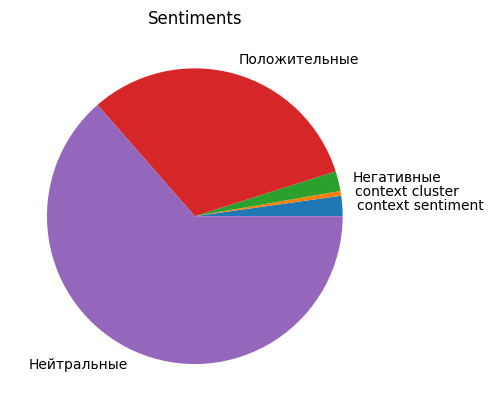

In [23]:
x = dat.groupby('sentiment_count').size().plot(kind = 'pie',labels=["context sentiment","context cluster","Негативные","Положительные", "Нейтральные"], title = 'Sentiments')  #e.g  in comparison to whole data

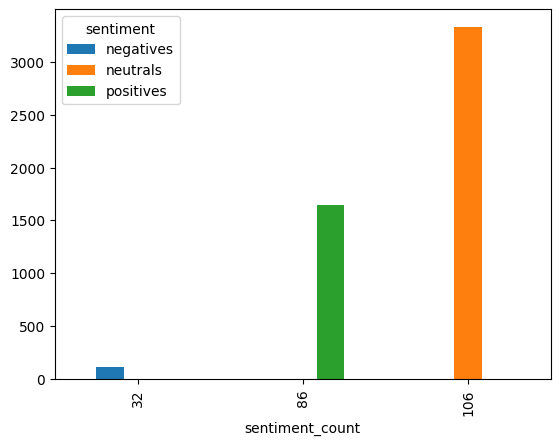

In [24]:
df2 = dat[dat['sentiment'] != 'context cluster']
df3 = df2[df2['sentiment'] != 'context sentiment']
df3.groupby(['sentiment_count'])['sentiment'].value_counts().unstack().plot(kind = 'bar');

In [25]:
top10=dat['answer'].value_counts(dropna=False)
top10.head(10)

развитие        16
общение         12
опыт            10
работа          10
безопасность     9
нет              9
все              9
стабильность     8
семья            8
москва           8
Name: answer, dtype: int64

In [26]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [27]:
dat['answer'] = dat['answer'].astype(str)
answer_text = " ".join(dat['answer'].to_list())
answer_text[:1000]

'прокачать тренерские знания прокачать тренерские компетенц прокачать тренерские навыки совершенствоваться повышение производительности получить ответы на вопросы узнать ответы на интерес. вопр решение вопросов понять дальнейшие действия понять управление персоналом посетить мастер-классы по инте прохождение мастер-классов применять применять знания на своём пр-е примеры реализованных проектов проверить свои знания проектная деятельность управление проектами стать тренером фцк рассказать стране о шт расширение творческих границ систематизация стать продуктивнее в работе обучай. применяйте. соверш. применяй обучай совершенствуй kazakhstan netherlands qatar quatar russia uk vv ireland luxembourg новые возможности новые смыслы образовательных с профильный летний лагерь содержательно в переговорах не спешить всё гибкость гибкость в переговорах договариваться модель 3д в переговорах поправить собственную модель не готов не садись за стол оценка переговор 5 10 15 стратегию в переговорах песс

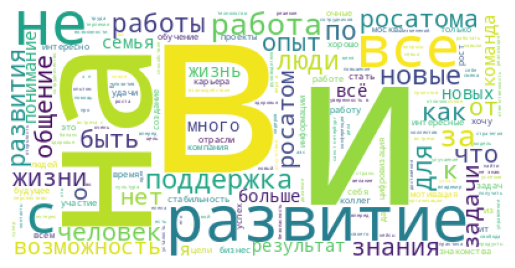

In [28]:
wordcloud = WordCloud(background_color="white").generate(answer_text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [29]:
dat = dat[dat['answer'].apply(len) > 5]
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
print(stopwords.words('russian'))

['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его', 'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы', 'по', 'только', 'ее', 'мне', 'было', 'вот', 'от', 'меня', 'еще', 'нет', 'о', 'из', 'ему', 'теперь', 'когда', 'даже', 'ну', 'вдруг', 'ли', 'если', 'уже', 'или', 'ни', 'быть', 'был', 'него', 'до', 'вас', 'нибудь', 'опять', 'уж', 'вам', 'ведь', 'там', 'потом', 'себя', 'ничего', 'ей', 'может', 'они', 'тут', 'где', 'есть', 'надо', 'ней', 'для', 'мы', 'тебя', 'их', 'чем', 'была', 'сам', 'чтоб', 'без', 'будто', 'чего', 'раз', 'тоже', 'себе', 'под', 'будет', 'ж', 'тогда', 'кто', 'этот', 'того', 'потому', 'этого', 'какой', 'совсем', 'ним', 'здесь', 'этом', 'один', 'почти', 'мой', 'тем', 'чтобы', 'нее', 'сейчас', 'были', 'куда', 'зачем', 'всех', 'никогда', 'можно', 'при', 'наконец', 'два', 'об', 'другой', 'хоть', 'после', 'над', 'больше', 'тот', 'через', 'эти', 'нас', 'про', 'всего', 'них', 'какая', 'много', 'разве', 'три', 'эту', 'моя', 'впр

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [30]:
from string import punctuation
noise = stopwords.words('russian')
punctuation_new = list(punctuation) + list('»') + list('«')+list('!"#$%&\'()*+,./:;<=>?@[\\]^_`{|}~')

In [31]:
def remove_stopwords(text):
    no_punct_text = ''.join([s for s in text if s not in punctuation_new])
    clean_text = [word for word in no_punct_text.lower().split()
                  if word not in noise]
    return ' '.join(clean_text)

In [32]:
dat['answer_text_clean'] = dat['answer'].apply(remove_stopwords)

<ipython-input-32-a8dbd6e631a5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat['answer_text_clean'] = dat['answer'].apply(remove_stopwords)


In [ ]:
dat.loc[:,['answer', 'answer_text_clean']].sample(10)

,answer,answer_text_clean
5119,юниоры росатома,юниоры росатома
1062,латинский,латинский
2414,какие есть резервы в ао фпк,какие резервы ао фпк
3154,ответственность за коллектив,ответственность коллектив
1553,закрытие гпр,закрытие гпр
2237,компетенции,компетенции
1337,взаимопомощь,взаимопомощь
3765,открытие истинных желаний,открытие истинных желаний
3378,иваново,иваново
1970,потрясающие примеры из жизни,потрясающие примеры жизни


In [33]:
answer_text2 = " ".join(dat['answer_text_clean'].to_list())
wordcloud = WordCloud(background_color="white",
                     ).generate(answer_text2)


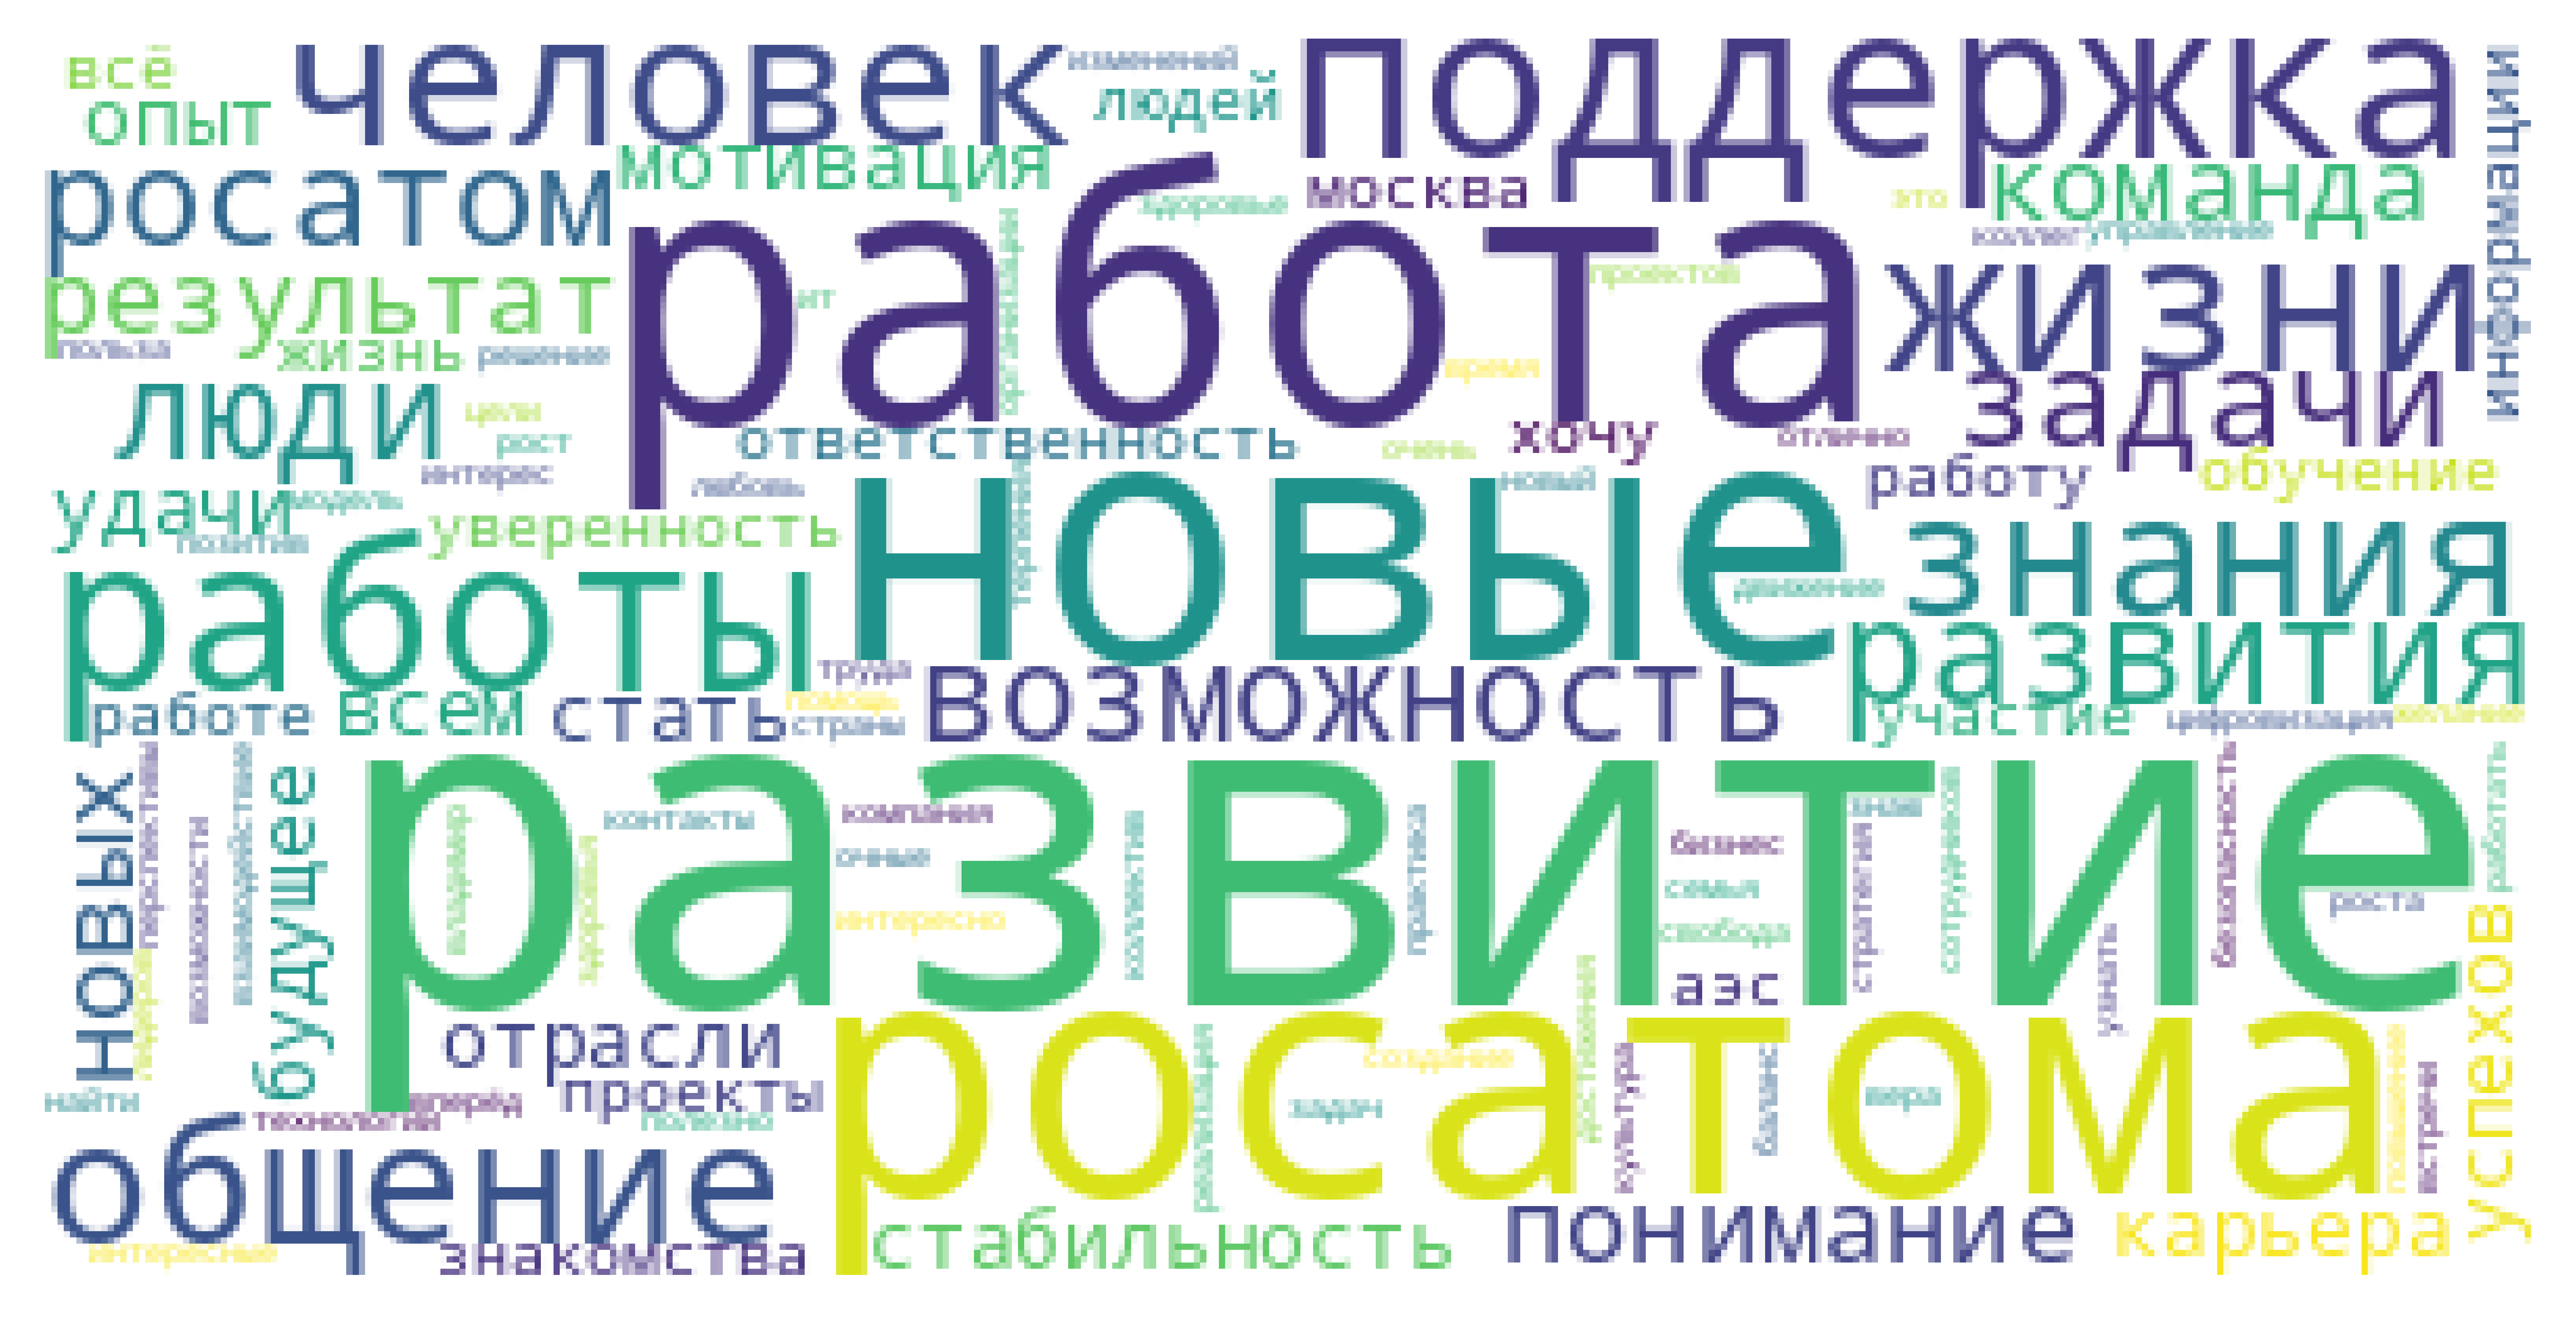

In [34]:
plt.figure(figsize=[10,7], dpi=1200)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [35]:
dat['answer_text_clean'] = dat['answer_text_clean'].apply(lambda x: x.lower())
text3 = " ".join(dat['answer_text_clean'].to_list())
wordcloud = WordCloud(stopwords=noise,
                      background_color="white").generate(text3)

<ipython-input-35-0b51df2607a6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat['answer_text_clean'] = dat['answer_text_clean'].apply(lambda x: x.lower())


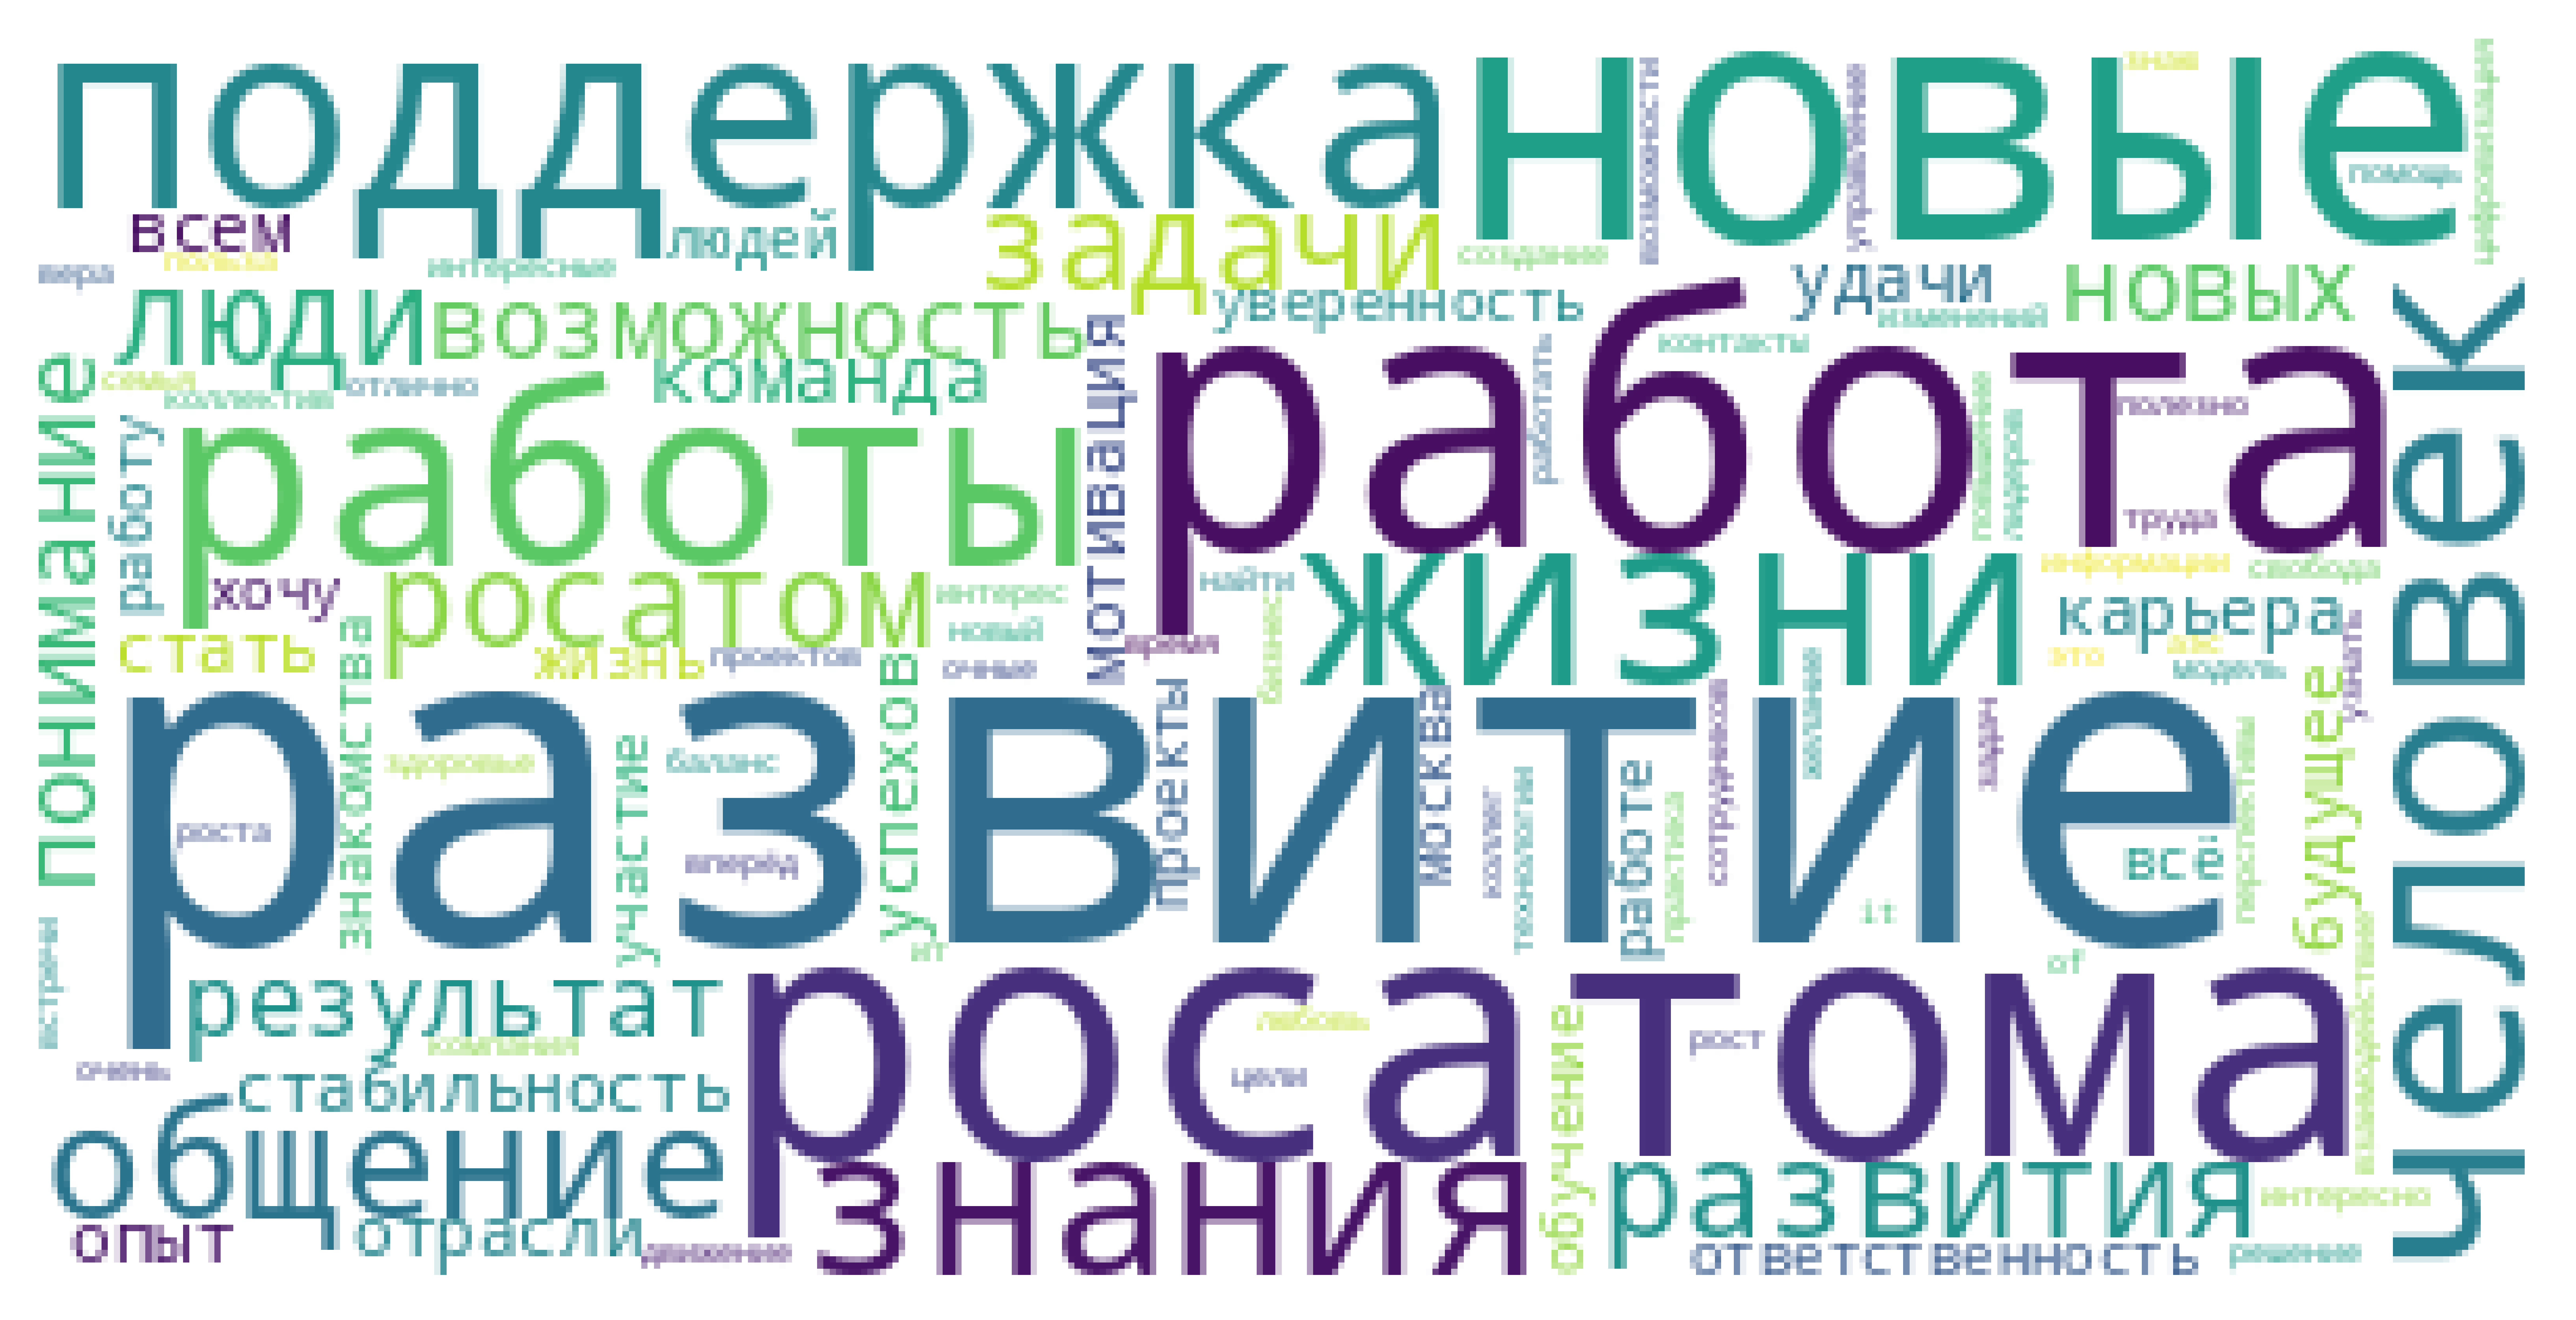

In [36]:
plt.figure(figsize=[10,7], dpi=1200)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [41]:
path_all='/content/drive/MyDrive/HackathonRosatom/all/'

In [47]:
path_all = '/content/drive/MyDrive/das_pirat_OS/all'
full_list3=[]
i=0
for file in os.listdir(path_all):
    try:
        with open(path_all+"/"+file,'r', encoding='Utf-8') as json_data:
            res_loaded = json.load(json_data)
            #k=res1_loaded['question']


            answer = res_loaded['answers'] #зашиваем список со  всеми словарями наших постов
            full_list = {'questions':[],'id':[],'answers':[]}
            full_list2={}
            full_list = {'questions':[],'id':[],'answers':[]}
            question_list={}
            id_list={}
            for i in range(0,len(answer)):
                full_list1=[]
                question_list['questions']= res_loaded['question']
                question_list['id']= res_loaded['id']
                for j in range(len(answer)):

                    full_list1.append(answer[j])
                full_list2['answers']=full_list1


            full_list.update(full_list2)
            full_list.update(question_list)
            full_list.update(id_list)

            id1=full_list['id']
            k1=full_list['questions']
            for answer in full_list['answers']:
                l = [k1]+[id1]+[answer['answer'], answer['count']]
                full_list3.append(l)

    except ValueError:
        pass

In [48]:
dat = pd.DataFrame(full_list3)
pd.set_option('display.max_colwidth', None)
dat.columns = ['question','id', 'answer', 'count']
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29664 entries, 0 to 29663
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   question  29664 non-null  object
 1   id        29664 non-null  int64 
 2   answer    29664 non-null  object
 3   count     29664 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 927.1+ KB


In [49]:
dat['index_q']=0
k=0
i=0
for  i in range(0,len(dat['id'])-1):
    if dat['id'][i+1]==dat['id'][i]:
      dat['index_q'][i+1]=dat['index_q'][i]
     # dat['index_q']=i
    else:
      dat['index_q'][i+1]=k+1
      k+=1


<ipython-input-49-888d78e470ff>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat['index_q'][i+1]=dat['index_q'][i]
<ipython-input-49-888d78e470ff>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat['index_q'][i+1]=k+1


In [50]:
dat = pd.DataFrame(full_list3)
pd.set_option('display.max_colwidth', None)
dat.columns = ['question','id', 'answer', 'count']
dat

,question,id,answer,count
0,Что вы сможете использовать в своей работе?,10106,"формулировать проблему, 5 поче",1
1,Что вы сможете использовать в своей работе?,10106,поиск потерь,1
2,Что вы сможете использовать в своей работе?,10106,правило 5 «почему» :),1
3,Что вы сможете использовать в своей работе?,10106,умение работать в команде,1
4,Что вы сможете использовать в своей работе?,10106,картирование и анализ,1
...,...,...,...,...
29659,Что поможет сделать программу более полезной для вас?,6343,больше практики,1
29660,Что поможет сделать программу более полезной для вас?,6343,ничего. все отлично,1
29661,Что поможет сделать программу более полезной для вас?,6343,все хорошо,1
29662,Что поможет сделать программу более полезной для вас?,6343,офлайн формат,1


In [52]:
dat['answer_count'] = (dat.groupby("question")['answer'].transform('nunique'))

In [56]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [62]:
dat['answer'] = dat['answer'].astype(str)
wordcloud = WordCloud(background_color="#F0F8FF").generate(answer_text)

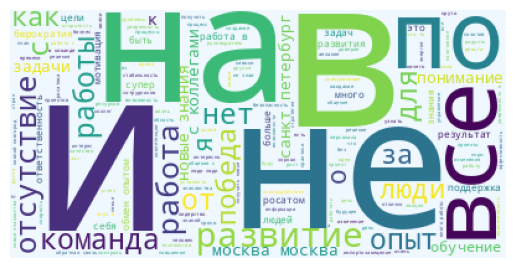

In [63]:
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [64]:
dat = dat[dat['answer'].apply(len) > 5]

In [65]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
print(stopwords.words('russian'))


['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его', 'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы', 'по', 'только', 'ее', 'мне', 'было', 'вот', 'от', 'меня', 'еще', 'нет', 'о', 'из', 'ему', 'теперь', 'когда', 'даже', 'ну', 'вдруг', 'ли', 'если', 'уже', 'или', 'ни', 'быть', 'был', 'него', 'до', 'вас', 'нибудь', 'опять', 'уж', 'вам', 'ведь', 'там', 'потом', 'себя', 'ничего', 'ей', 'может', 'они', 'тут', 'где', 'есть', 'надо', 'ней', 'для', 'мы', 'тебя', 'их', 'чем', 'была', 'сам', 'чтоб', 'без', 'будто', 'чего', 'раз', 'тоже', 'себе', 'под', 'будет', 'ж', 'тогда', 'кто', 'этот', 'того', 'потому', 'этого', 'какой', 'совсем', 'ним', 'здесь', 'этом', 'один', 'почти', 'мой', 'тем', 'чтобы', 'нее', 'сейчас', 'были', 'куда', 'зачем', 'всех', 'никогда', 'можно', 'при', 'наконец', 'два', 'об', 'другой', 'хоть', 'после', 'над', 'больше', 'тот', 'через', 'эти', 'нас', 'про', 'всего', 'них', 'какая', 'много', 'разве', 'три', 'эту', 'моя', 'впр

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [66]:
from string import punctuation
noise = stopwords.words('russian')
punctuation_new = list(punctuation) + list('»') + list('«')+list('!"#$%&\'()*+,./:;<=>?@[\\]^_`{|}~')

In [68]:
def remove_stopwords(text):
    no_punct_text = ''.join([s for s in text if s not in punctuation_new])
    clean_text = [word for word in no_punct_text.lower().split()
                  if word not in noise]
    return ' '.join(clean_text)

In [69]:
dat['answer_text_clean'] = dat['answer'].apply(remove_stopwords)

<ipython-input-69-a8dbd6e631a5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat['answer_text_clean'] = dat['answer'].apply(remove_stopwords)


In [70]:
dat.loc[:,['answer', 'answer_text_clean']].sample(10)

,answer,answer_text_clean
7509,создание проекта,создание проекта
11337,знания+общение,знанияобщение
15949,общение,общение
26959,москва,москва
22755,новые приключения шурика,новые приключения шурика
4971,из споров рождается истина,споров рождается истина
13618,снижение переработки,снижение переработки
22191,победа - референции технологий,победа референции технологий
22561,не вышло,вышло
18936,"индексация зп, процессы",индексация зп процессы


In [ ]:
answer_text2 = " ".join(dat['answer_text_clean'].to_list())
wordcloud = WordCloud(background_color="#F0F8FF",
                     ).generate(answer_text2)

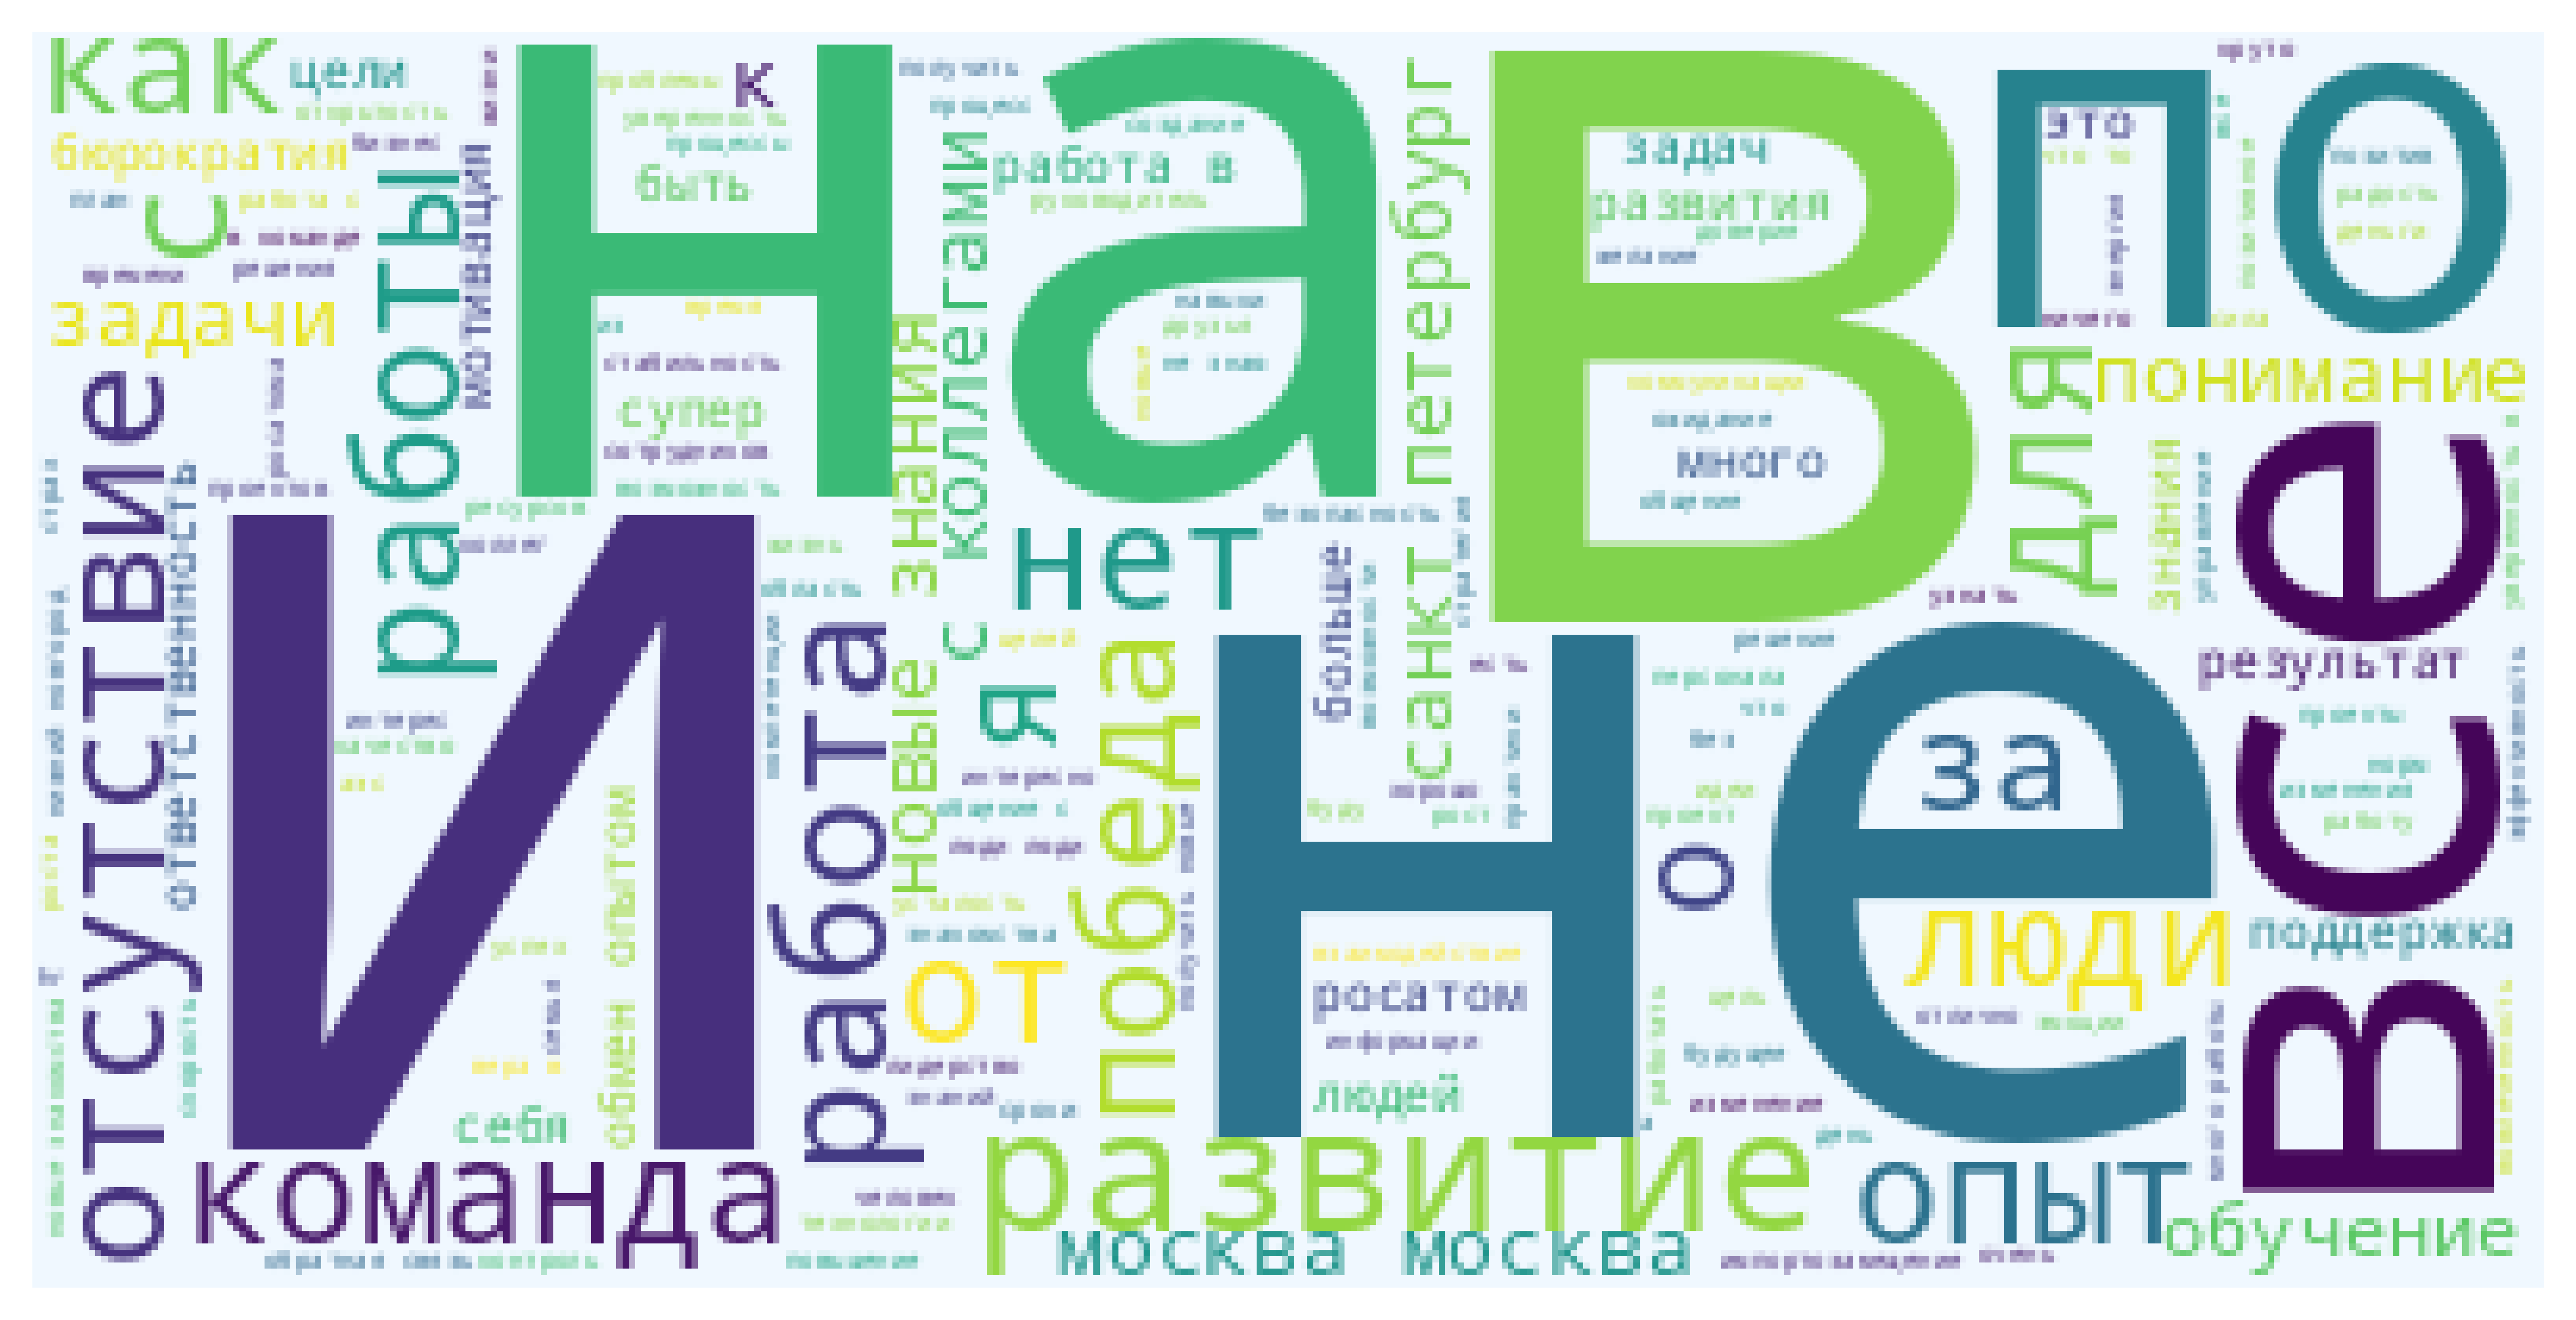

In [71]:
plt.figure(figsize=[10,7], dpi=800)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
class LSI(object):
	def __init__(self, stopwords, ignorechars, docs):
		self.wdict = {}
		self.dictionary = []
		self.docs = []
		self.stopwords = stopwords
		if type(ignorechars) == str: ignorechars = ignorechars.encode('utf-8')
		self.ignorechars = ignorechars
		for doc in docs: self.add_doc(doc)

	def prepare(self):
		self.build()
		self.calc()

	def dic(self, word, add = False):
		if type(word) == str: word = word.encode('utf-8')
		# чистим от лишних символом
		word = word.lower().translate(None, self.ignorechars)
		word = word.decode('utf-8')
		# приводим к начальной форме
		word = stemmer.stem(word)
		# если слово есть в словаре возвращаем его номер
		if word in self.dictionary: return self.dictionary.index(word)
		else:
			# если нет и стоит флаг автоматически добавлять то пополняем словари возвращвем код слова
			if add:
				#self.ready = False
				self.dictionary.append(word)
				return len(self.dictionary) - 1
			else:
				return None


	def add_doc(self, doc):
		words = [self.dic(word, True) for word in doc.lower().split()]
		self.docs.append(words)
		for word in words:
			if word in self.stopwords:
				continue
			elif word in self.wdict:
				self.wdict[word].append(len(self.docs) - 1)
			else:
				self.wdict[word] = [len(self.docs) - 1]

	def build(self):
      # убираем одиночные слова
		self.keys = [k for k in self.wdict.keys() if len(self.wdict[k]) > 0]
		self.keys.sort()
      # создаём пустую матрицу
		self.A = np.zeros([len(self.keys), len(self.docs)])
      # наполняем эту матрицу
		for i, k in enumerate(self.keys):
			for d in self.wdict[k]:
				self.A[i,d] += 1

#Вычисление U, S Vt - матриц
	def calc(self):
		self.U, self.S, self.Vt = np.linalg.svd(self.A)


	def TFIDF(self):
      # всего кол-во слов на документ
		wordsPerDoc = sum(self.A, axis=0)
      # сколько документов приходится на слово
		docsPerWord = sum(np.asarray(self.A > 0, 'i'), axis=1)
		rows, cols = self.A.shape
		for i in range(rows):
			for j in range(cols):
				self.A[i,j] = (self.A[i,j] / wordsPerDoc[j]) * np.log(float(cols) / docsPerWord[i])

	def dump_src(self):
		self.prepare()
		print ('Здесь представлен расчет матрицы ')
		for i, row in enumerate(self.A):
			print (self.dictionary[i], row)

	def print_svd(self):
		self.prepare()
		print ('Здесь сингулярные значения')
		print (self.S)
		print ('Здесь первые 3 колонки U матрица ')
		for i, row in enumerate(self.U):
			print (self.dictionary[self.keys[i]], row[0:3])
		print ('Здесь первые 3 строчки Vt матрица')
		print (-1*self.Vt[0:3, :])

	def find(self, word):
		self.prepare()
		idx = self.dic(word)
		if not idx:
			print('слово не встречается')
			return []
		if not idx in self.keys:
			print('слово отброшено как не имеющее значения которое через stopwords')
			return []
		idx = self.keys.index(idx)
		print('word --- '), word, '=', self.dictionary[self.keys[idx]], '.\n'
		# получаем координаты слова
		wx, wy = (-1 * self.U[:, 1:3])[idx]
		print(('word{}\t{:0.2f}\t{:0.2f}\t{}\n').format(idx, wx, wy, word)) #:0.2f
		arts = []
		xx, yy = -1 * self.Vt[1:3, :]
		for k, v in enumerate(self.docs):
			# получаем координаты документа
			ax, ay = xx[k], yy[k]
			#вычисляем расстояние между словом и документом
			dx, dy = float(wx - ax), float(wy - ay)
			arts.append((k, v, ax, ay, np.sqrt(dx * dx + dy * dy)))
		# возвращаем отсортированный по расстоянию список
		return sorted(arts, key = lambda a: a[4])


In [ ]:

#path = '/content/drive/MyDrive/das_pirat_OS/labeled'
#full_list3=[]

docs = col_list [:100]
word = "проект"
ignorechars = ''',:'!'''
lsa = LSI([], ignorechars, docs)
lsa.build()
lsa.dump_src()
lsa.calc()
lsa.print_svd()

for res in lsa.find(word):
	print (res[0], res[4], res[1], docs[res[0]])

Здесь представлен расчет матрицы 
что [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
вы [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
сможете [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
использовать [1. 1. 1. 1. 1. 1. 1